# Parameters estimation for a normal distribution (Python file)

For a population whose distribution is normal, we have to cases in bayesian statistics. One where we only determine the mean $\mu$, and the variance $\sigma^2$ is known; and one where both parameters are undetermined.

In [16]:
import numpy as np
import scipy.special as sp


# First we get a random number between 0 and 100 for the mean (to estimate)
random_mean = 100*np.random.rand()
# Also one number between 0 and 10 for variance
random_variance = 100*np.random.rand()

# We need a function with a normal (multiple) distribution for the prior and posterior.
# The function will take an x values, a mean and a variance
def normal(X,mean,variance):
    return (2*np.pi*variance)**(-1/2) * np.exp(-(X-mean)**2/(2*variance))

# We use a invgamma distribution for the precision (1/variance) prior and posterior
def invgamma(mu,alpha,beta):
    return (beta**alpha)/sp.gamma(alpha) * mu**(-alpha-1) * np.exp(-beta/mu)

# We define a function gamma for the presion (1/variance) prior and posterior
def gamma(mu,alpha,beta):
    return (beta**alpha)/sp.gamma(alpha) * mu**(alpha-1) * np.exp(-beta*mu)

## Estimations

Now, in the following cells you can insert the parameters that you need for the priori and for the sample. You can allways replay this cell, which will show the graphs for the priori and posterior, the parameters, and info about the sample taken.cWe must ask the user if the variance will be or will be not known, so depending on the selected option, we use the proper update process.

Remember that the distribution for the mean $\mu$ is normal with mean $\mu_i$ (Where $i$ changes depending on prior or posterior), and std dev $s_i$. For the case where the variance is known, this two values are updated.

For the case where both the variance and the mean are unknown, $s_0^2$ takes the form $\sigma^2/\omega$ for the prior, where $\sigma^2$ is the variance to estimate and $\omega$ a guess to correlate the mean's distribution and the populatuion's distribution. Also, the variance $\sigma^2$ follows an inverse gamma distribution ($1/\sigma^2$) with parameters $k/2$ and $k \sigma_0^2 /2$, so that the expected value is $1/\sigma_0^2$, and the variance is $2/(k \sigma_0^4)$ (so $\sigma_0^2$ is the value we estimate for $\sigma^2$, and $k$ is the degree of confidence) 

The samples taken from the population are: [68.80189004 63.79219587 88.44756294 85.45582884 75.07427548 86.4734137
 78.8792137  68.89963438 80.11071952 72.49416054 71.9168238  95.55965984
 68.58347301 69.26833812 75.70719278 73.21627678 91.23130355 93.86330687
 88.73581274 78.91177935 68.88155879 81.67917648 77.11921525 71.53475305
 92.55246427]
Prior mean: 50.0, Prior variance: 50.0
Posterior mean: 73.90633432313874, Posterior variance: 191.6471933384163
Prior confidence degree for mean: 5.0, Prior confidence degree for variance: 5.0
Posterior confidence degree for mean: 30.0, Posterior confidence degree for variance: 30.0


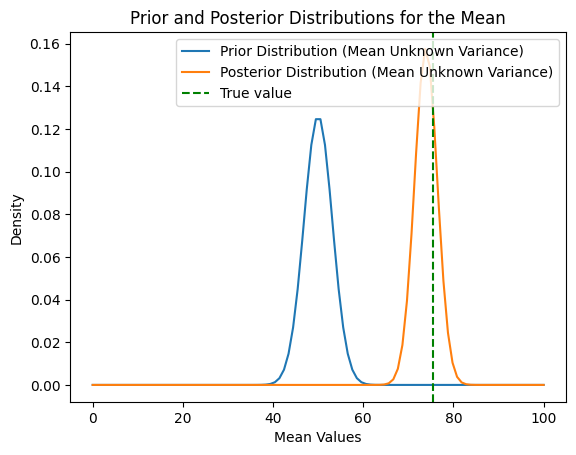

In [36]:
# We ask for the estimated mean


mu_prior = float(input("Enter the mean estimated for the population's distribution"))

# We ask if the process will be done with the variance known or unknown
variance_known = int(input("The variance will be known? (0 or 1 for no and yes): "))
if variance_known == 1:
    # We reveal just the variance
    print(f'The variance for the population distribution is {random_variance}')
    # We ask for the variance (confidence) of the mean provided as a prior
    s_prior = float(input("Enter the variance for the mean prior distribution (confidence degree)"))
else:
    # We ask for the estimated variance for the population distribution
    variance_prior = float(input("Enter the estimated variance for the population distribution: "))
    # We ask then for the confidence degree for the mean and the variance
    omega = float(input("Enter the confidence degree for the mean prior distribution: "))
    kappa = float(input("Enter the confidence degree for the variance prior distribution: "))

# We ask for the ammount of samples to take
n = int(input("Enter the number of samples to take from the population: "))

# We take the samples from the population
samples = np.random.normal(random_mean, np.sqrt(random_variance), n)
print(f"The samples taken from the population are: {samples}")

# Now we compute the posterior parameters
if variance_known == 1:
    s_post = 1 / (1/s_prior + n/random_variance)
    mu_post = s_post * (mu_prior/s_prior + n*np.mean(samples)/random_variance)
if variance_known == 0:
    kappa_post = kappa + n
    omega_post = omega + n
    mu_post = (omega*mu_prior + n*np.mean(samples)) / (omega + n)
    variance_post = (1/(n+omega)) * (kappa*variance_prior + np.sum((samples - np.mean(samples))**2) + (omega*n/(omega+n))*(np.mean(samples)-mu_prior)**2)

# We print the prior and posterior parameters
if variance_known == 1:
    print(f"Prior mean: {mu_prior}, Prior variance (mean dist): {s_prior}")
    print(f"Posterior mean: {mu_post}, Posterior variance: {s_post}")
else:
    print(f"Prior mean: {mu_prior}, Prior variance: {variance_prior}")
    print(f"Posterior mean: {mu_post}, Posterior variance: {variance_post}")
    print(f"Prior confidence degree for mean: {omega}, Prior confidence degree for variance: {kappa}")
    print(f"Posterior confidence degree for mean: {omega_post}, Posterior confidence degree for variance: {kappa_post}")

# Then we graph the prior and posterior distributions for the mean
import matplotlib.pyplot as plt
mu_values = np.linspace(0, 100, 100)
if variance_known == 1:
    prior_values = normal(mu_values, mu_prior, s_prior)
    posterior_values = normal(mu_values, mu_post, s_post)
    plt.plot(mu_values, prior_values, label='Prior Distribution (Mean Known Variance)')
    plt.plot(mu_values, posterior_values, label='Posterior Distribution (Mean Known Variance)')
else:
    prior_values = normal(mu_values, mu_prior, variance_prior/omega)
    posterior_values = normal(mu_values, mu_post, variance_post/omega_post)
    plt.plot(mu_values, prior_values, label='Prior Distribution (Mean Unknown Variance)')
    plt.plot(mu_values, posterior_values, label='Posterior Distribution (Mean Unknown Variance)')
plt.axvline(random_mean, color='green', linestyle='--', label='True value')
plt.xlabel('Mean Values')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions for the Mean')
plt.legend()
plt.show()

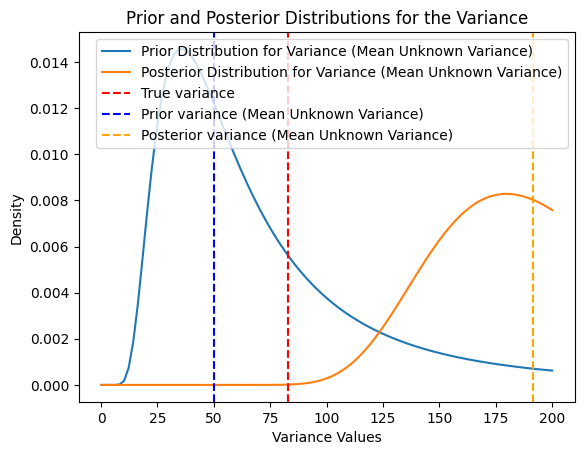

In [37]:
# We also graph the prior and posterior distributions for the variance if it is unknown
if variance_known == 0:
    variance_values = np.linspace(0.1, 200, 100)
    prior_variance_values = invgamma(variance_values, kappa/2, kappa*variance_prior/2)
    posterior_variance_values = invgamma(variance_values, kappa_post/2, kappa_post*variance_post/2)
    plt.plot(variance_values, prior_variance_values, label='Prior Distribution for Variance (Mean Unknown Variance)')
    plt.plot(variance_values, posterior_variance_values, label='Posterior Distribution for Variance (Mean Unknown Variance)')
    plt.axvline(random_variance, color='red', linestyle='--', label='True variance')
    # We put on a similar line the prior and posterior mean variance for the known variance case
    plt.axvline(variance_prior, color='blue', linestyle='--', label='Prior variance (Mean Unknown Variance)')
    plt.axvline(variance_post, color='orange', linestyle='--', label='Posterior variance (Mean Unknown Variance)')
    plt.xlabel('Variance Values')
    plt.ylabel('Density')
    plt.title('Prior and Posterior Distributions for the Variance')
    plt.legend()
    plt.show()

## Simulation for parameter selection

To visualize how the parameters affect the results when the variance is unknown, lets play with the parameters.
First let's set the "unknown" parameters to a value above 50 and bellow 100. (75 and 80)

In [17]:
# We set what will be the parameters to estimate (in theory unknown both)
random_mean = 75
random_variance = 80

Then we create a function that gets the prior parameters on a list, the samples to take (n), and the real parameters and returns a list with the popsteriors (est mean, est variance, omega, kappa); and a function that given the prior and posterior parameters, graphs.

In [55]:
#We define a global variable to store the samples
samples = None

# we create a function to compute the normal distribution for the prior and posterior
def posterior_normal(prior_parameters,n,real_values):
    global samples
    # we take sepparate the prior parameters
    mu_prior, variance_prior, omega, kappa = prior_parameters
    # We take the samples from the population
    samples = np.random.normal(real_values[0], np.sqrt(real_values[1]), n)

    # we compute the posterior parameters
    kappa_post = kappa + n
    omega_post = omega + n
    mu_post = (omega*mu_prior + n*np.mean(samples)) / (omega + n)
    variance_post = (1/(n+omega)) * (kappa*variance_prior + np.sum((samples - np.mean(samples))**2) + (omega*n/(omega+n))*(np.mean(samples)-mu_prior)**2)
    return mu_post, variance_post, omega_post, kappa_post

# The function to graph the prior and posterior distributions for the mean and presion (1/variance)
#this to take into account that the expected value matches by the 1/variance and not the variance itself
def graph_distributions(prior_parameters, posterior_parameters, real_values):
    # we import the necessary libraries
    import matplotlib.pyplot as plt
    # We create 2 subplots, one for the mean and one for the variance
    fig, axs = plt.subplots(1, 2, figsize=(24, 7))
    # we take sepparate the prior and posterior parameters
    mu_prior, variance_prior, omega, kappa = prior_parameters
    mu_post, variance_post, kappa_post, omega_post = posterior_parameters
    # we create the x values for the mean and variance
    mu_values = np.linspace(0, 100, 100)
    presicion_values = np.linspace(0.001, 0.1, 100)
    # we compute the prior and posterior values for the mean and variance
    prior_mean_values = normal(mu_values, mu_prior, variance_prior/omega)
    posterior_mean_values = normal(mu_values, mu_post, variance_post/omega_post)
    prior_presicion_values = gamma(presicion_values, kappa/2, kappa*variance_prior/2)
    posterior_presicion_values = gamma(presicion_values, kappa_post/2, kappa_post*variance_post/2)
    # we plot the prior and posterior distributions for the mean
    axs[0].plot(mu_values, prior_mean_values, color='blue', label='Prior Distribution for Mean')
    axs[0].plot(mu_values, posterior_mean_values, color='red', label='Posterior Distribution for Mean')
    # we put a vertical line for the true, prior and posterior mean values
    axs[0].axvline(mu_prior, color='blue', linestyle='--', label='Prior mean value')
    axs[0].axvline(mu_post, color='red', linestyle='--', label='Posterior mean value')
    axs[0].axvline(real_values[0], color='green', linestyle='--', label='True mean value')
    # labels and title for the mean plot
    axs[0].set_xlabel('Mean Values')
    axs[0].set_ylabel('Density')
    axs[0].set_title('Prior and Posterior Distributions for the Mean')
    # we place the legend out of the plot
    axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
    # we plot the prior and posterior distributions for the presicion (1/variance)
    axs[1].plot(presicion_values, prior_presicion_values, color='blue', label='Prior Distribution for Presicion')
    axs[1].plot(presicion_values, posterior_presicion_values, color='red', label='Posterior Distribution for Presicion')
    # we put a vertical line for the true, prior and posterior presicion values
    axs[1].axvline(1/real_values[1], color='green', linestyle='--', label='True presicion value')
    axs[1].axvline(1/variance_prior, color='blue', linestyle='--', label='Prior presicion value')
    axs[1].axvline(1/variance_post, color='red', linestyle='--', label='Posterior presicion value')
    # labels and title for the variance plot
    axs[1].set_xlabel('Variance Values')
    axs[1].set_ylabel('Density')
    axs[1].set_title('Prior and Posterior Distributions for the Variance')
    # we place the legend out of the plot
    axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    # we adjust the layout and show the plots
    plt.tight_layout()
    plt.show()

We test with a prior estimated mean and variance of 50, and $k$ and $\omega$ parameters of one.

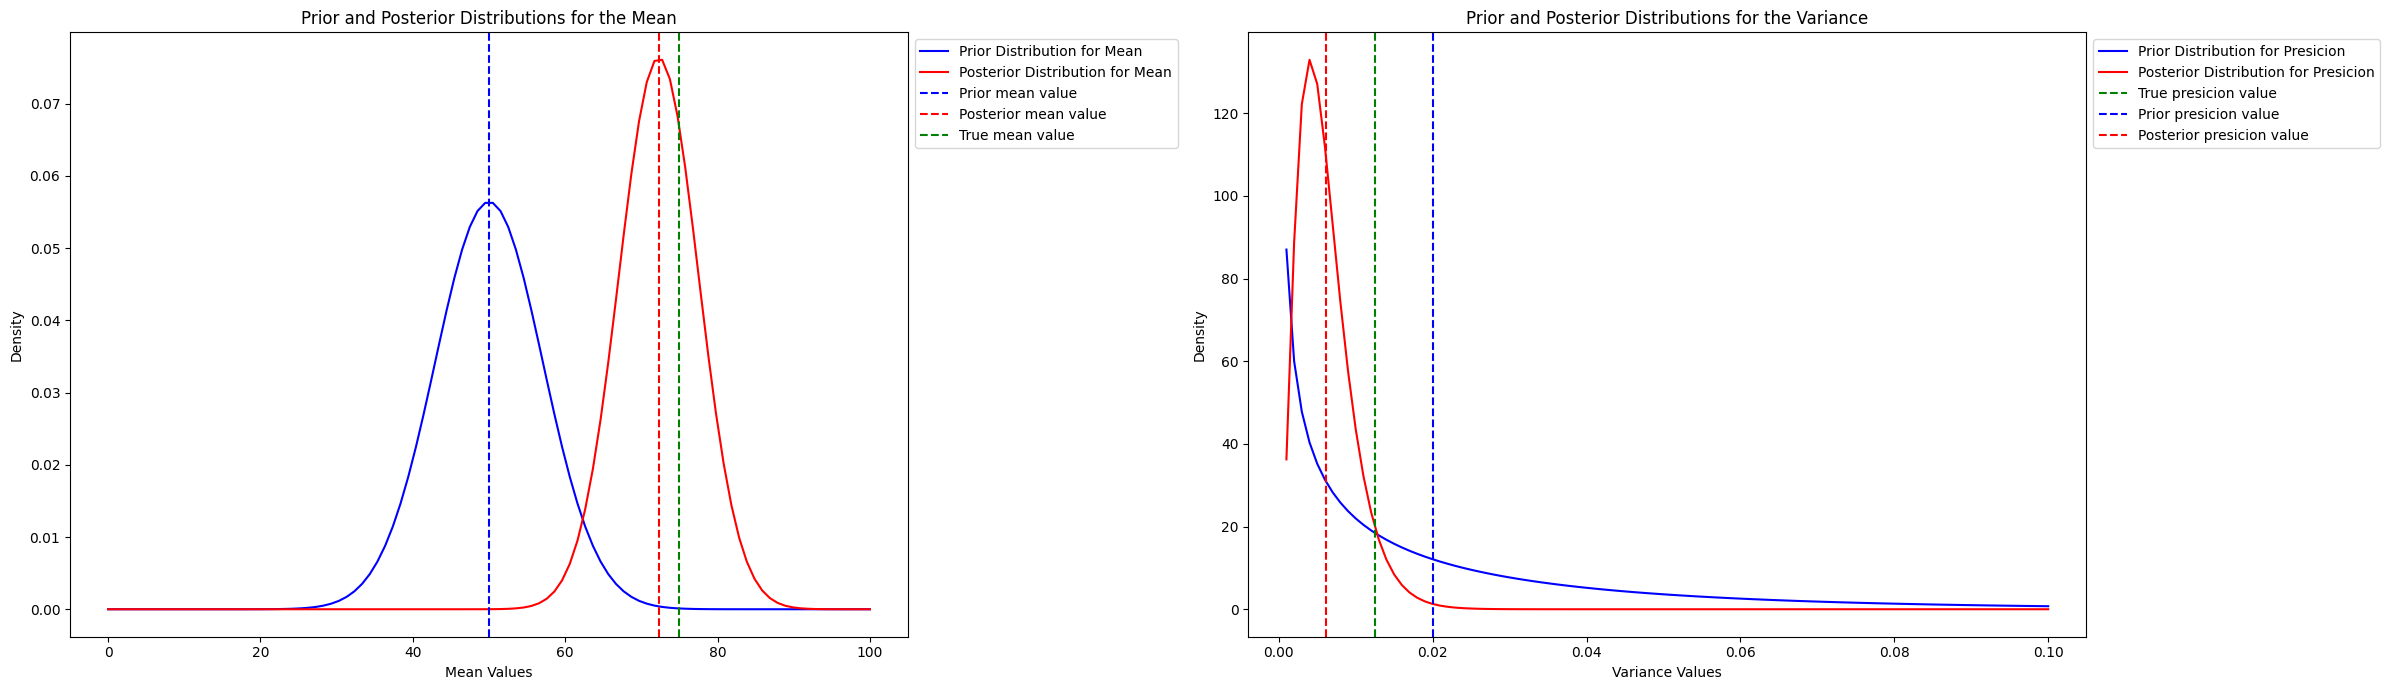

In [30]:
# We set the prior parameters for the mean and variance
prior_parameters = (50, 50, 1, 1) # (mu_prior, variance_prior, omega, kappa)
# We compute the posterior parameters
posterior_parameters = posterior_normal(prior_parameters, n=5, real_values=(random_mean, random_variance))
# We graph the prior and posterior distributions for the mean and variance
graph_distributions(prior_parameters, posterior_parameters, real_values=(random_mean, random_variance))

We can see that the mean curve actually gets closer to the real value, but that doesn't seem to happen for the variance curve. To see why that happens, lets remember that the posterior variance may be calculated as a wighted average of the form:

$$
\sigma_1^2 = \frac{k}{k+n} \sigma_0^2 + \frac{n}{k+n} \left( s^2 + \frac{\omega}{\omega + n} (\bar{x} - \mu_0)^2 \right)
$$

In [36]:
# We compare the data variance (populations formula) with the correction term for the variance in the posterior distribution
data_variance = np.var(samples, ddof=0)  # Population variance
# We set the omega and mu_prior values for the correction term
omega = prior_parameters[2]
mu_prior = prior_parameters[0]
n = len(samples)
correction_term = (omega/(omega+n))*(np.mean(samples)-mu_prior)**2
# we print the data variance and the correction term
print(f"Data variance (population formula): {data_variance}")
print(f"Correction term for the variance in the posterior distribution: {correction_term}")

#Then we obtain the weighted terms for the variance in the posterior distribution, and the weights
k = prior_parameters[3]
weights = (k/(k+n), n/(k+n))
weighted_variance_terms = (prior_parameters[1],  float(data_variance + correction_term))
print(f"Weights for the variance terms in the posterior distribution: {weights}")
print(f"Variance terms in the posterior distribution: {weighted_variance_terms}")

Data variance (population formula): 67.35816708079973
Correction term for the variance in the posterior distribution: 119.11524284731395
Weights for the variance terms in the posterior distribution: (0.16666666666666666, 0.8333333333333334)
Variance terms in the posterior distribution: (50, 186.47340992811368)


Now, the larger $n$ makes the second termn account for more, and the high value of $\omega$ and difference of means make the second term drift away for the data variance, so we can test with with a lower $\omega$ first

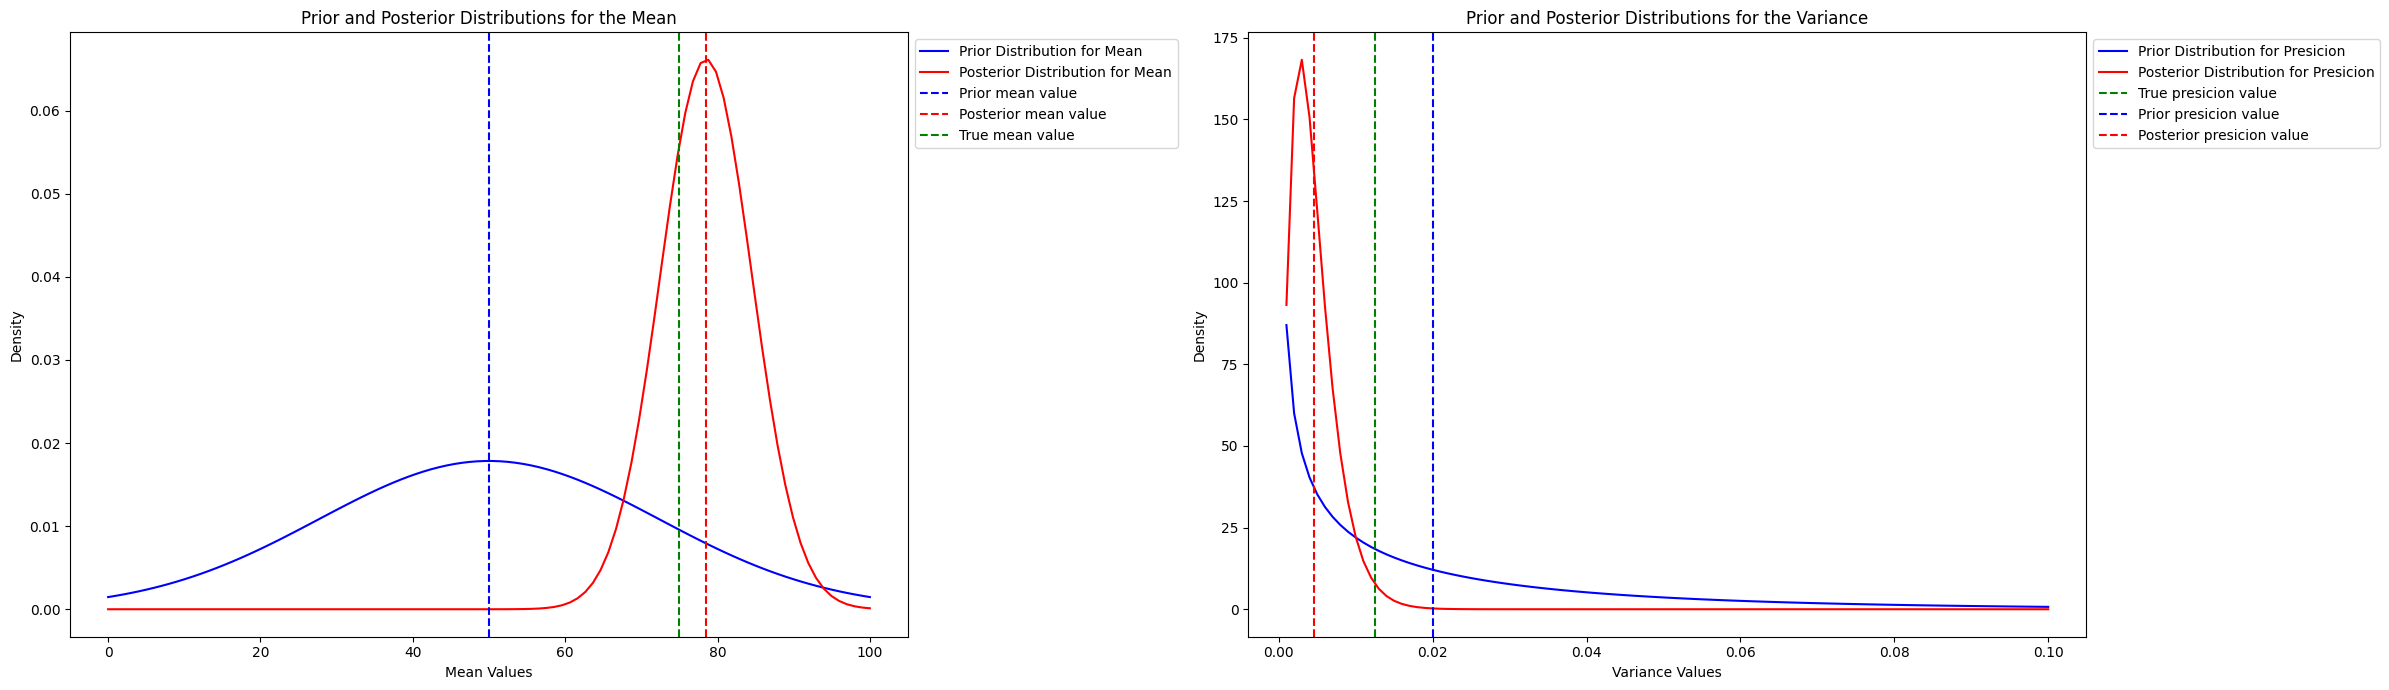

In [56]:
# We set the prior parameters for the mean and variance
prior_parameters = (50, 50, 0.1, 1) # (mu_prior, variance_prior, omega, kappa)
# We compute the posterior parameters
posterior_parameters = posterior_normal(prior_parameters, n=5, real_values=(random_mean, random_variance))
# We graph the prior and posterior distributions for the mean and variance
graph_distributions(prior_parameters, posterior_parameters, real_values=(random_mean, random_variance))

In [57]:
# We compare the data variance (populations formula) with the correction term for the variance in the posterior distribution
data_variance = np.var(samples, ddof=0)  # Population variance
# We set the omega and mu_prior values for the correction term
omega = prior_parameters[2]
mu_prior = prior_parameters[0]
n = len(samples)
correction_term = (omega/(omega+n))*(np.mean(samples)-mu_prior)**2
# we print the data variance and the correction term
print(f"Data variance (population formula): {data_variance}")
print(f"Correction term for the variance in the posterior distribution: {correction_term}")

#Then we obtain the weighted terms for the variance in the posterior distribution, and the weights
k = prior_parameters[3]
weights = (k/(k+n), n/(k+n))
weighted_variance_terms = (prior_parameters[1],  float(data_variance + correction_term))
print(f"Weights for the variance terms in the posterior distribution: {weights}")
print(f"Variance terms in the posterior distribution: {weighted_variance_terms}")

Data variance (population formula): 195.83518789845454
Correction term for the variance in the posterior distribution: 16.56815932711904
Weights for the variance terms in the posterior distribution: (0.16666666666666666, 0.8333333333333334)
Variance terms in the posterior distribution: (50, 212.40334722557358)


Now, the correction term is much lower, but the variance tend to disperse a lot, making in some cases irrelevant and inaccurate the sample varianve. We can increase the number of samples, or (and) give more weight to our prior increasing the $k$ value, let's do both, considering the previous result.

In [58]:
# We print the old and new prior parameters
print(f"Old prior parameters: {prior_parameters}")
print (f"New prior parameters: {posterior_parameters}")
# we use the posterior parameters as prior parameter now
prior_parameters = posterior_parameters

Old prior parameters: (50, 50, 0.1, 1)
New prior parameters: (np.float64(78.49850299398184), np.float64(218.0424972799741), 5.1, 6)


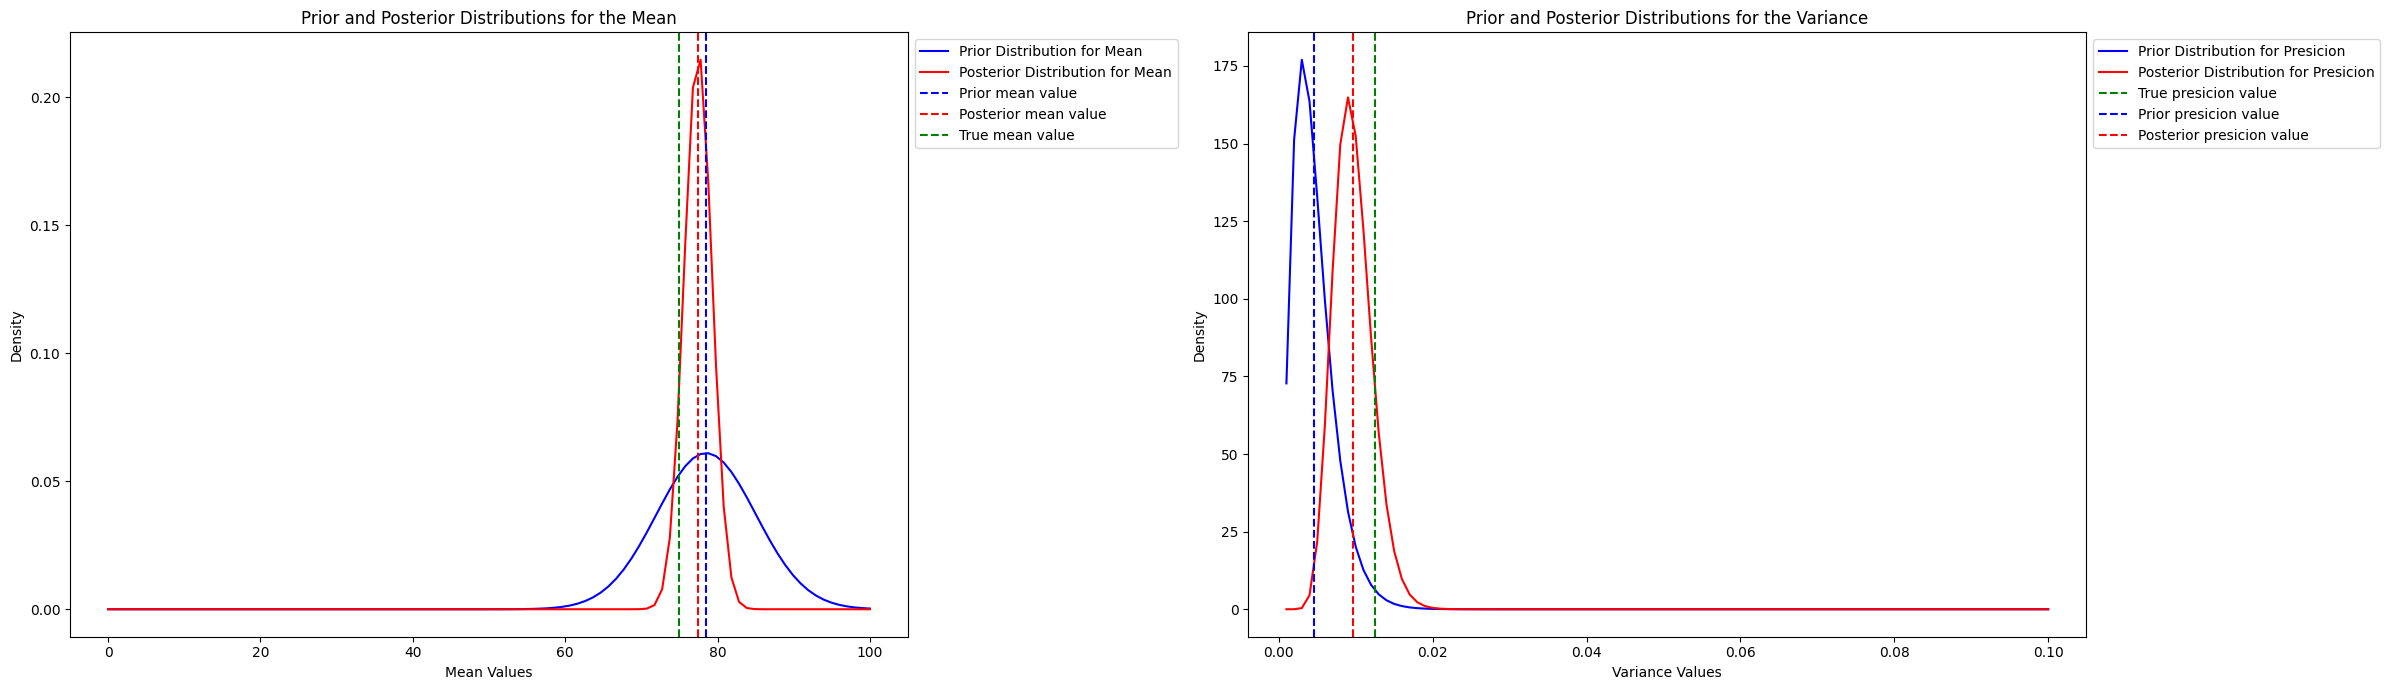

In [59]:
# We compute the posterior parameters, now taking 25 samples instead of 5
posterior_parameters = posterior_normal(prior_parameters, n=25, real_values=(random_mean, random_variance))
# We graph the prior and posterior distributions for the mean and variance
graph_distributions(prior_parameters, posterior_parameters, real_values=(random_mean, random_variance))

In [60]:
# We compare the data variance (populations formula) with the correction term for the variance in the posterior distribution
data_variance = np.var(samples, ddof=0)  # Population variance
# We set the omega and mu_prior values for the correction term
omega = prior_parameters[2]
mu_prior = prior_parameters[0]
n = len(samples)
correction_term = (omega/(omega+n))*(np.mean(samples)-mu_prior)**2
# we print the data variance and the correction term
print(f"Data variance (population formula): {data_variance}")
print(f"Correction term for the variance in the posterior distribution: {correction_term}")

#Then we obtain the weighted terms for the variance in the posterior distribution, and the weights
k = prior_parameters[3]
weights = (k/(k+n), n/(k+n))
weighted_variance_terms = (prior_parameters[1],  float(data_variance + correction_term))
print(f"Weights for the variance terms in the posterior distribution: {weights}")
print(f"Variance terms in the posterior distribution: {weighted_variance_terms}")

Data variance (population formula): 72.07627979831528
Correction term for the variance in the posterior distribution: 0.27324224930304847
Weights for the variance terms in the posterior distribution: (0.1935483870967742, 0.8064516129032258)
Variance terms in the posterior distribution: (np.float64(218.0424972799741), 72.34952204761834)
